In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data_ball = pd.read_csv('training_dataset/DataSet/IPL_Ball_by_Ball_2008_2022.csv')
data_match = pd.read_csv('training_dataset/DataSet/IPL_Matches_Result_2008_2022.csv')
data_ipl_2k23_player_team=pd.read_csv('training_dataset/DataSet/Ipl_2023 _cricketers - Players.csv')

In [3]:
data_ball.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
data_ipl_2k23_player_team.head()

,player,Team
0,YBK Jaiswal,RR
1,JC Buttler,RR
2,SV Samson,RR
3,D Padikkal,RR
4,SO Hetmyer,RR


In [5]:
data_match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [6]:
data_ball.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

## Ball Dataset Preprocessing

### Data Cleaning

In [7]:
data_ball = pd.read_csv('training_dataset/DataSet/IPL_Ball_by_Ball_2008_2022.csv')
data_ball.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [8]:
data_ball.shape

(225954, 17)

In [9]:
data_ball['extra_type'].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [10]:
data_ball.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [11]:
data_ball = data_ball.drop(['extra_type', 'kind', 'fielders_involved', 'batsman_run', 'extras_run', 'isWicketDelivery'], axis = 1)

In [12]:
data_ball.isnull().sum()

ID                   0
innings              0
overs                0
ballnumber           0
batter               0
bowler               0
non-striker          0
total_run            0
non_boundary         0
player_out      214803
BattingTeam          0
dtype: int64

In [13]:
data_ball['player_out'] = data_ball['player_out'].replace([np.nan], ['Not out'])

In [14]:
data_ball.shape

(225954, 11)

In [15]:
data_ball.head(40)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,non_boundary,player_out,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,Not out,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,Not out,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,4,0,Not out,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals


In [16]:
ID = list(data_ball['ID'].unique())

In [17]:
data_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            225954 non-null  int64 
 1   innings       225954 non-null  int64 
 2   overs         225954 non-null  int64 
 3   ballnumber    225954 non-null  int64 
 4   batter        225954 non-null  object
 5   bowler        225954 non-null  object
 6   non-striker   225954 non-null  object
 7   total_run     225954 non-null  int64 
 8   non_boundary  225954 non-null  int64 
 9   player_out    225954 non-null  object
 10  BattingTeam   225954 non-null  object
dtypes: int64(6), object(5)
memory usage: 19.0+ MB


In [18]:
data_ball['total_run'].value_counts()

total_run
1    93861
0    79253
4    25828
2    15065
6    10603
3      836
5      444
7       64
Name: count, dtype: int64

In [19]:
#data_ball = data_ball.drop(data_ball.loc[data_ball['total_run'] == 5].index)
#data_ball = data_ball.drop(data_ball.loc[data_ball['total_run'] == 3].index)
data_ball = data_ball.drop(data_ball.loc[data_ball['total_run'] == 7].index)

In [20]:
data_ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,non_boundary,player_out,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,Not out,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,Not out,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals


In [21]:
data_ball.isna().sum()

ID              0
innings         0
overs           0
ballnumber      0
batter          0
bowler          0
non-striker     0
total_run       0
non_boundary    0
player_out      0
BattingTeam     0
dtype: int64

In [22]:
data_match_venue = data_match[['ID', 'Venue']]

In [23]:
data_match_venue.head()

,ID,Venue
0,1312200,"Narendra Modi Stadium, Ahmedabad"
1,1312199,"Narendra Modi Stadium, Ahmedabad"
2,1312198,"Eden Gardens, Kolkata"
3,1312197,"Eden Gardens, Kolkata"
4,1304116,"Wankhede Stadium, Mumbai"


## Match Dataset Preprocessing

In [24]:
lc = LabelEncoder()
Venue_encoded_ = pd.DataFrame(lc.fit_transform(data_match_venue['Venue']), columns = ['Venue'])
Venue_encoded = pd.concat([data_match_venue['ID'], Venue_encoded_['Venue']], axis = 1)
Venue_encoded


,ID,Venue
0,1312200,26
1,1312199,26
2,1312198,12
3,1312197,12
4,1304116,47
...,...,...
945,335986,11
946,335985,46
947,335984,13
948,335983,33


## Ball dataset with Venue

In [25]:
combined_data = pd.merge(data_ball, Venue_encoded, on = 'ID')

In [26]:
combined_data.isnull().sum()

ID              0
innings         0
overs           0
ballnumber      0
batter          0
bowler          0
non-striker     0
total_run       0
non_boundary    0
player_out      0
BattingTeam     0
Venue           0
dtype: int64

In [27]:
combined_data = combined_data.dropna()

In [28]:
combined_data.head(30)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,non_boundary,player_out,BattingTeam,Venue
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,26
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,Not out,Rajasthan Royals,26
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,Not out,Rajasthan Royals,26
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,26
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,26
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,26
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals,26
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals,26
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,4,0,Not out,Rajasthan Royals,26
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals,26


## Players data preprocessing

In [29]:
batter_bowler_run_data = combined_data[['batter', 'bowler', 'Venue', 'total_run']]

In [30]:
batter_bowler_run_data.head()

,batter,bowler,Venue,total_run
0,YBK Jaiswal,Mohammed Shami,26,0
1,YBK Jaiswal,Mohammed Shami,26,1
2,JC Buttler,Mohammed Shami,26,1
3,YBK Jaiswal,Mohammed Shami,26,0
4,YBK Jaiswal,Mohammed Shami,26,0


In [31]:
batter_bowler_run_data.shape

(225890, 4)

In [32]:
X = batter_bowler_run_data.iloc[:, :-1]
y = batter_bowler_run_data.iloc[:, -1]

In [33]:
import seaborn as sns

<Axes: xlabel='total_run', ylabel='count'>

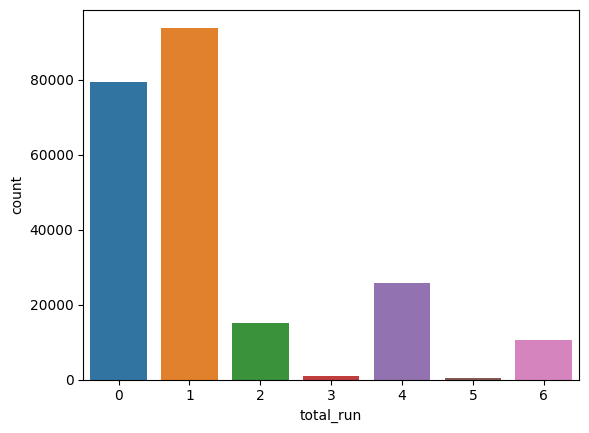

In [34]:
sns.countplot(x = y)

In [35]:
X['batter'].nunique()

605

In [36]:
X['bowler'].nunique()

472

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# Encoding
le = LabelEncoder()
X['batter_encoded'] = le.fit_transform(X['batter'])
X['bowler_encoded'] = le.fit_transform(X['bowler'])

In [39]:
X.head()

,batter,bowler,Venue,batter_encoded,bowler_encoded
0,YBK Jaiswal,Mohammed Shami,26,596,275
1,YBK Jaiswal,Mohammed Shami,26,596,275
2,JC Buttler,Mohammed Shami,26,219,275
3,YBK Jaiswal,Mohammed Shami,26,596,275
4,YBK Jaiswal,Mohammed Shami,26,596,275


In [40]:
encoding=dict(enumerate(list(set(X.batter.unique().tolist()+X.bowler.unique().tolist()))))
encoding = {value: key for key, value in encoding.items()}
encoding

{'SP Jackson': 0,
 'MV Boucher': 1,
 'KD Karthik': 2,
 'I Malhotra': 3,
 'LJ Wright': 4,
 'CH Gayle': 5,
 'PWH de Silva': 6,
 'Younis Khan': 7,
 'R Sharma': 8,
 'MN Samuels': 9,
 'A Symonds': 10,
 'Rashid Khan': 11,
 'YS Chahal': 12,
 'Sunny Singh': 13,
 'CK Langeveldt': 14,
 'JJ Bumrah': 15,
 'FA Allen': 16,
 'AJ Tye': 17,
 'AN Ahmed': 18,
 'PH Solanki': 19,
 'A Zampa': 20,
 'S Vidyut': 21,
 'JL Pattinson': 22,
 'Y Prithvi Raj': 23,
 'Y Gnaneswara Rao': 24,
 'CJ Green': 25,
 'S Gopal': 26,
 'OC McCoy': 27,
 'RE van der Merwe': 28,
 'C Nanda': 29,
 'JM Bairstow': 30,
 'YBK Jaiswal': 31,
 'DL Chahar': 32,
 'NM Coulter-Nile': 33,
 'K Goel': 34,
 'Mohammad Ashraful': 35,
 'B Stanlake': 36,
 'MF Maharoof': 37,
 'RS Sodhi': 38,
 'RW Price': 39,
 'Anmolpreet Singh': 40,
 'M Kartik': 41,
 'JM Kemp': 42,
 'Akash Singh': 43,
 'JJ van der Wath': 44,
 'Q de Kock': 45,
 'JDP Oram': 46,
 'TP Sudhindra': 47,
 'JPR Scantlebury-Searles': 48,
 'SB Wagh': 49,
 'DT Christian': 50,
 'WD Parnell': 51,
 'VY

In [41]:
X.shape

(225890, 5)

In [42]:
X_le = X[['batter_encoded', 'bowler_encoded', 'Venue']]

In [43]:
X_le.head()

,batter_encoded,bowler_encoded,Venue
0,596,275,26
1,596,275,26
2,219,275,26
3,596,275,26
4,596,275,26


In [44]:
print(X_le.shape)
print(y.shape)

(225890, 3)
(225890,)


### Resampled players data using the combination of Undersampling and Oversampling

In [45]:
from imblearn.combine import SMOTETomek

sampler = SMOTETomek(random_state=42)

X_resampled, y_resampled = sampler.fit_resample(X_le, y)

### Test and train split on resampled players data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_le, y, test_size = 0.2, random_state = 0)

In [48]:
y.unique()

array([0, 1, 4, 6, 3, 2, 5], dtype=int64)

## Players Data Modelling

### Decision tree classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.38      0.53      0.44     15698
           1       0.45      0.49      0.47     18893
           2       0.08      0.02      0.03      3028
           3       0.00      0.00      0.00       193
           4       0.14      0.05      0.07      5174
           5       0.00      0.00      0.00        75
           6       0.13      0.03      0.05      2117

    accuracy                           0.40     45178
   macro avg       0.17      0.16      0.15     45178
weighted avg       0.35      0.40      0.36     45178



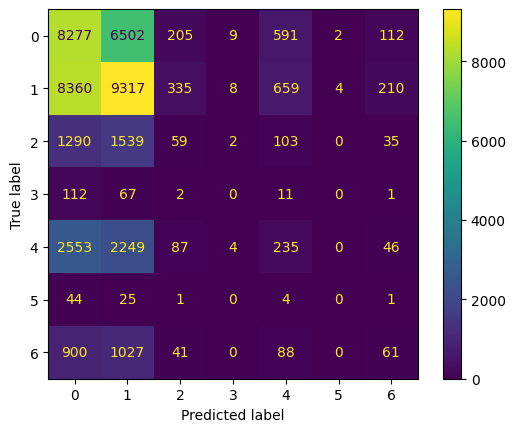

In [50]:
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train, y_train)

y_pred = dtc_clf.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [51]:
param_dist = {
    'max_depth': [3, 13, 23, 33],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(dtc_clf,
                                   param_distributions = param_dist,
                                   n_iter = 500,
                                   cv = 5,
                                   n_jobs = -1
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 13, 23, 33],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

C:\Users\parul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\parul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\parul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344

              precision    recall  f1-score   support

           0       0.39      0.34      0.36     15698
           1       0.44      0.72      0.55     18893
           2       0.07      0.00      0.00      3028
           3       0.00      0.00      0.00       193
           4       0.16      0.01      0.01      5174
           5       0.00      0.00      0.00        75
           6       0.03      0.00      0.00      2117

    accuracy                           0.42     45178
   macro avg       0.15      0.15      0.13     45178
weighted avg       0.34      0.42      0.35     45178



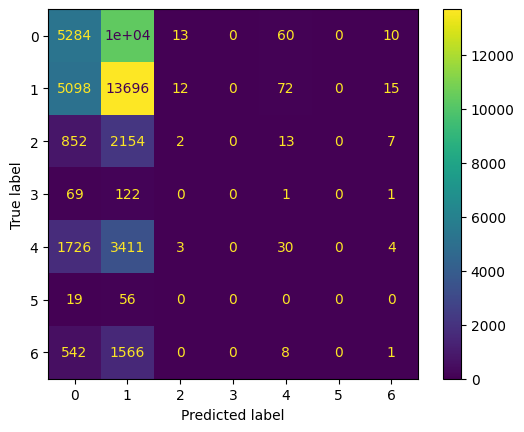

In [52]:
model = random_search.best_estimator_
y_pred =  model.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [53]:
random_search.score(X_test, y_test)

0.42084642967816194

In [54]:
random_search.score(X_train, y_train)

0.4517685599185444

In [55]:
random_search.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': 13,
 'criterion': 'gini'}